# Car Classification - (0-EV, 1-Non EV)
- Used pre-trained weights from ImageNet trained on ResNet50 to classify cars into EV or Non-EV
- Opted for transfer learning to save time and resources to train a model from scratch 

In [13]:
# import the required libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [116]:
import os

## Data Understanding

In [180]:
training_ev =  os.listdir("CarDataset/Train/EV")
print("Number of EV images in training dataset:", len(training_ev))

training_n_ev =  os.listdir("CarDataset/Train/NON_EV")
print("Number of Non EV images in training dataset:", len(training_n_ev))

testing_ev =  os.listdir("CarDataset/Test/EV")
print("Number of EV images in testing dataset:", len(testing_ev))

testing_n_ev =  os.listdir("CarDataset/Test/NON_EV")
print("Number of Non EV images in testing dataset:", len(testing_n_ev))


Number of EV images in training dataset: 56
Number of Non EV images in training dataset: 40
Number of EV images in testing dataset: 46
Number of Non EV images in testing dataset: 28


## Set Image Size

In [14]:
IMAGE_SIZE = [224, 224]

## Get weights from ImageNet

In [15]:
# Use imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',
                  include_top=False)

94781440/94765736 [==============================] - 6s 0us/step


## Get Model Summary of ResNet50

In [29]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
# This helps to get number of output classes
classes = glob('CarDataset/*')

# Our Layers
x = Flatten()(resnet.output)
prediction = Dense(len(classes), activation='softmax')(x)
# creating object model
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Compile Model

In [30]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

## Pre-process images

In [104]:
# Using the Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range =
                      0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('CarDataset/train/',
                                         target_size = (224, 224),
                                         batch_size = 22,
                                         class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('CarDataset/test/',
                                        target_size = (224, 224),
                                        batch_size = 22,
                                        class_mode = 'categorical')

Found 96 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


## Model fit

In [81]:
# fit the model
r = model.fit(training_set, validation_data=test_set,
                       epochs=50, steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 0.1011 - accuracy: 0.9792 - val_loss: 0.2399 - val_accuracy: 0.9189
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 0.0966 - accuracy: 0.9896 - val_loss: 0.2222 - val_accuracy: 0.9189
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.0816 - accuracy: 0.9896 - val_loss: 0.2307 - val_accuracy: 0.8919
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 0.2619 - accuracy: 0.8958 - val_loss: 0.1782 - val_accuracy: 0.9595
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.2045 - accuracy: 0.8854 - val_loss: 0.6736 - val_accuracy: 0.7703
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 0.3632 - accuracy: 0.8542 - val_loss: 0.9681 - val_accuracy: 0.7027
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.4394 - accuracy: 0.8229 - val_loss: 0.4516 - val_accuracy: 0.8243
Epoch 8/50
5/5 [=========================

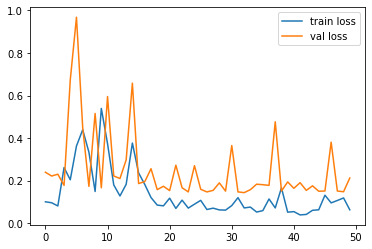

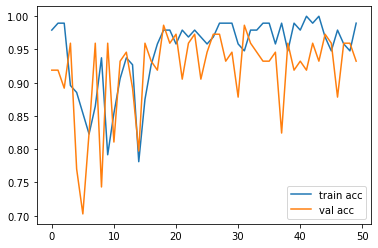

<Figure size 432x288 with 0 Axes>

In [102]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('carmodel_resnet50.h5')

C:\Users\esthe\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Predict

In [106]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [107]:
print(np.bincount(y_pred))

[51 23]


## Create functions for testing & display

In [164]:
def process_data(data_folder,img_dir):
    path = os.path.join(data_folder,img_dir) 
    path = path.replace('\\', '/')
    img = image.load_img(path, target_size = (224,224))
    orig_img = image.img_to_array(img)
    # normalize img 
    x = orig_img/225
    #Expand the Dimensions of the image
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    
    return orig_img, img_data
    

In [161]:
# get prediction 
def get_prediction(model,img_data):
    model.predict(img_data)
    a=np.argmax(model.predict(img_data), axis=1)
    
    if a==1:
        str_predicted='Non EV'
    else:
        str_predicted='EV'
        
    return str_predicted
        

## Show Test Results (Non EV)

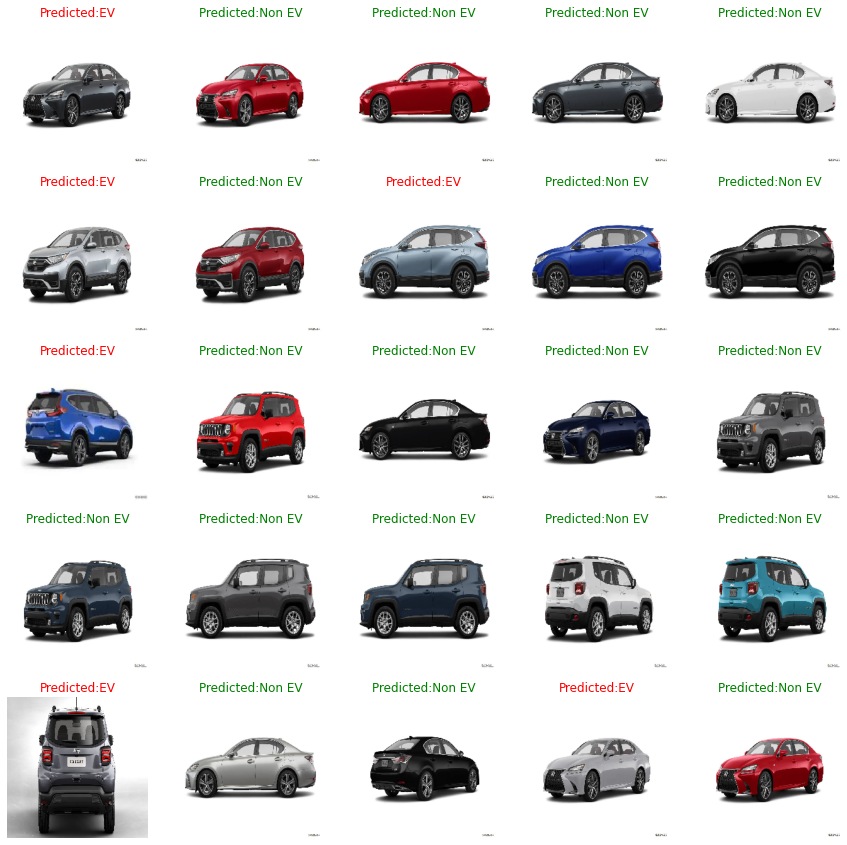

In [172]:
# display prediction 
f, ax = plt.subplots(5,5, figsize=(15,15))
test_img_list = os.listdir("CarDataset/Test/NON_EV")
data_folder = ('CarDataset/Test/NON_EV')
i = 0

for  img_dir in test_img_list[:25]:

    orig_img, img_data = process_data(data_folder,img_dir)
    str_predicted = get_prediction(model,img_data)
#     print(str_predicted)

    ax[i//5, i%5].imshow(orig_img.astype('uint8'))
    ax[i//5, i%5].axis('off')
    if str_predicted == "Non EV":
        colour = ("Green")
        ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted), color = colour)
    else:
        colour = ("Red")
        ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted), color = colour)
    i += 1 

plt.show()

## Show Test Results (EV)

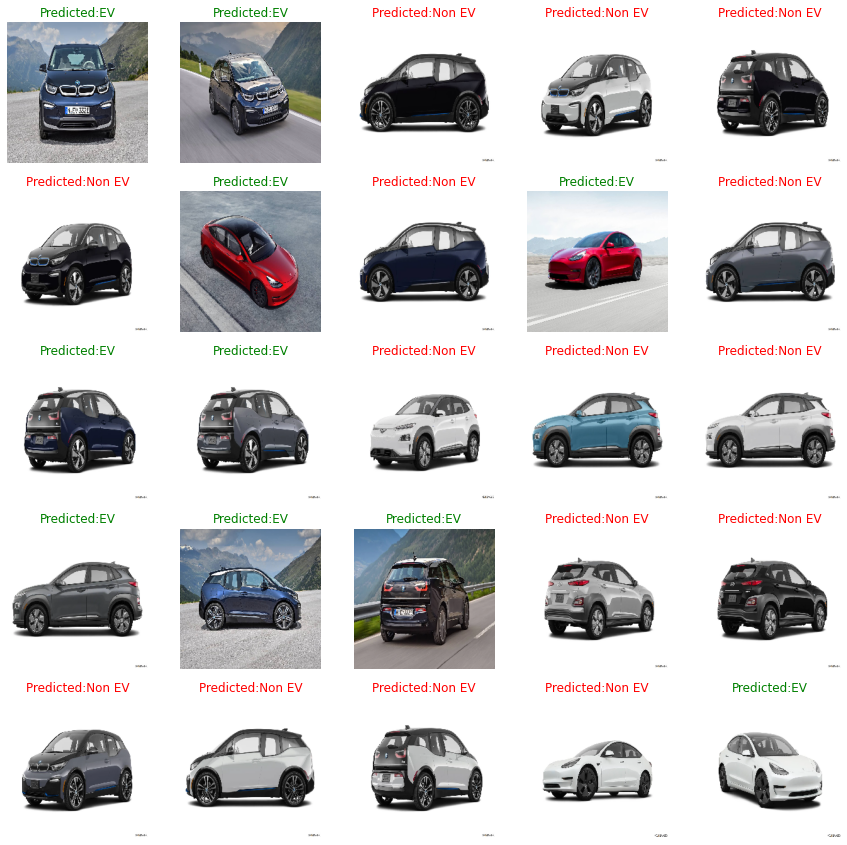

In [173]:
# display prediction 
f, ax = plt.subplots(5,5, figsize=(15,15))
test_img_list = os.listdir("CarDataset/Test/EV")
data_folder = ('CarDataset/Test/EV')
i = 0

for  img_dir in test_img_list[:25]:

    orig_img, img_data = process_data(data_folder,img_dir)
    str_predicted = get_prediction(model,img_data)
#     print(str_predicted)

    ax[i//5, i%5].imshow(orig_img.astype('uint8'))
    ax[i//5, i%5].axis('off')
    if str_predicted == "EV":
        colour = ("Green")
        ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted), color = colour)
    else:
        colour = ("Red")
        ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted), color = colour)
    i += 1 

plt.show()

## Summary
- Classification accuracy of Non-EV cars are better despite EV cars having bigger training samples, this is because the training samples used for EV cars have greater variation in terms of the background
- To solve the problem mentioned above, more training data may be collected to create a model that can classify between cars in any background/condition 
- Further R&D to adjust and improve the tuning the parameters of the model such as adjusting the epoch, learning rate etc
- In the scenario of this use case in Sunway Group, it can be used in the car park to aid with the cashless parking system. In this case, images of only the front part of the car may be neccessary and can be easily captured when the car enters the parking lot